In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix ,f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.utils.class_weight import compute_class_weight 

In [ ]:
from classification_utilities import display_cm, display_adj_cm
from ReadData import *
from Accuracy import accuracy, accuracy_adjacent

In [ ]:
%cd ./logs
from log_well import *
%cd ../

/content/gdrive/My Drive/Regularize/logs
/content/gdrive/My Drive/Regularize


In [ ]:
well_number1, well_number2, well_number3, well_number4, well_number5, well_number6, well_number7, well_number8, well_number9, well_number10, well_number11, well_number12, WellName = ReadData()

In [ ]:
training_data = pd.concat([well_number1, well_number2, well_number4, well_number5, well_number6, well_number7, well_number8, well_number9, well_number10])
test_data = well_number3

training_data = training_data.drop('Well Name', axis=1)
test_data = test_data.drop('Well Name', axis=1)

X_training = training_data.drop('Facies', axis=1)
Y_training = training_data['Facies']

X_test = test_data.drop('Facies', axis=1)
Y_test = test_data['Facies']
    
X_training['Depth'], X_training['Formation'], X_training['GR'], X_training['ILD_log10'], X_training['DeltaPHI'], X_training['PHIND'], X_training['PE'], X_training['NM_M'], X_training['RELPOS'] = pd.to_numeric(X_training['Depth']), pd.to_numeric(X_training['Formation']), pd.to_numeric(X_training['GR']), pd.to_numeric(X_training['ILD_log10']), pd.to_numeric(X_training['DeltaPHI']), pd.to_numeric(X_training['PHIND']), pd.to_numeric(X_training['PE']), pd.to_numeric(X_training['NM_M']), pd.to_numeric(X_training['RELPOS'])
Y_training = pd.to_numeric(Y_training)
    
X_test['Depth'], X_test['Formation'], X_test['GR'], X_test['ILD_log10'], X_test['DeltaPHI'], X_test['PHIND'], X_test['PE'], X_test['NM_M'], X_test['RELPOS'] = pd.to_numeric(X_test['Depth']), pd.to_numeric(X_test['Formation']), pd.to_numeric(X_test['GR']), pd.to_numeric(X_test['ILD_log10']), pd.to_numeric(X_test['DeltaPHI']), pd.to_numeric(X_test['PHIND']), pd.to_numeric(X_test['PE']), pd.to_numeric(X_test['NM_M']), pd.to_numeric(X_test['RELPOS'])
Y_test = pd.to_numeric(Y_test)
    
Robust = RobustScaler().fit(X_training)
X_training = Robust.transform(X_training)
X_test = Robust.transform(X_test)

Standard = StandardScaler().fit(X_training)
X_training = Standard.transform(X_training)
X_test = Standard.transform(X_test)

MinMax = MinMaxScaler().fit(X_training)
X_training = MinMax.transform(X_training)
X_test = MinMax.transform(X_test)
    
a =  np.unique(Y_training)
weights = compute_class_weight(class_weight='balanced', classes=a, y=Y_training)
weights = dict(zip(np.unique(Y_training), weights))

In [12]:
KNN = KNeighborsClassifier(n_jobs=-1)

param_grid = { 
    'weights': ['uniform', 'distance'],
    'n_neighbors':np.linspace(1,101,100).astype(int)   
}

CV_KNN = GridSearchCV(estimator=KNN, param_grid=param_grid, cv=9)
CV_KNN.fit(X_training, Y_training)

KeyboardInterrupt: ignored

In [13]:
CV_KNN.best_params_

AttributeError: ignored

In [14]:
KNN=KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=74).fit(X_training, Y_training)

Y_Pred  = KNN.predict(X_test)
well_number3['Prediction'] = Y_Pred
conf = confusion_matrix(Y_test, Y_Pred)
display_cm(conf, Y_test)

           Pred      SS      CSiS      FSiS      SiSh      MS      WS      D      PS      BS Total
           True
             SS       0        89         0         0       0       0      0       0       0    89
           CSiS       0        56        33         0       0       0      0       0       0    89
           FSiS       0        66        51         0       0       0      0       0       0   117
           SiSh       0         0         0         1       0       0      0       0       6     7
             MS       0         0         0         7       8       0      0       0       4    19
             WS       0         1         0         9      21      26      0      14       0    71
              D       0         0         0         0       8       0      0       9       0    17
             PS       0         0         0         0       7      13      0      12       8    40
             BS       0         0         0         0       0       0      0       0       0 

/content/gdrive/My Drive/Regularize/classification_utilities.py:15: RuntimeWarning: invalid value encountered in true_divide
  precision = np.diagonal(conf)/conf.sum(axis=0).astype('float')
/content/gdrive/My Drive/Regularize/classification_utilities.py:16: RuntimeWarning: invalid value encountered in true_divide
  recall = np.diagonal(conf)/conf.sum(axis=1).astype('float')


In [ ]:
adjacent_facies = np.array([[1], [0,2], [1], [4], [3,5], [4,6,7], [5,7], [5,6,8], [6,7]])
display_adj_cm(conf, Y_test, adjacent_facies)

           Pred      SS      CSiS      FSiS      SiSh      MS      WS      D      PS      BS Total
           True
             SS      89         0         0         0       0       0      0       0       0    89
           CSiS       0        89         0         0       0       0      0       0       0    89
           FSiS       0         0       117         0       0       0      0       0       0   117
           SiSh       0         0         0         1       0       0      0       0       6     7
             MS       0         0         0         0      15       0      0       0       4    19
             WS       0         1         0         9       0      61      0       0       0    71
              D       0         0         0         0       8       0      9       0       0    17
             PS       0         0         0         0       7       0      0      33       0    40
             BS       0         0         0         0       0       0      0       0       0 

<ipython-input-9-f4b36f088186>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  adjacent_facies = np.array([[1], [0,2], [1], [4], [3,5], [4,6,7], [5,7], [5,6,8], [6,7]])
/content/gdrive/My Drive/Regularize/classification_utilities.py:119: RuntimeWarning: invalid value encountered in true_divide
  recall = np.diagonal(conf)/conf.sum(axis=1).astype('float')


In [ ]:
adjacent_facies = np.array([[1], [0,2], [1], [4], [3,5], [4,6,7], [5,7], [5,6,8], [6,7]])
conf = confusion_matrix(Y_test, Y_Pred)
print('Optimized facies classification accuracy = %.2f' % accuracy(conf))
print('Optimized adjacent facies classification accuracy = %.2f' % accuracy_adjacent(conf, adjacent_facies))

Optimized facies classification accuracy = 0.34
Optimized adjacent facies classification accuracy = 0.92


<ipython-input-10-25c7f52649ce>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  adjacent_facies = np.array([[1], [0,2], [1], [4], [3,5], [4,6,7], [5,7], [5,6,8], [6,7]])


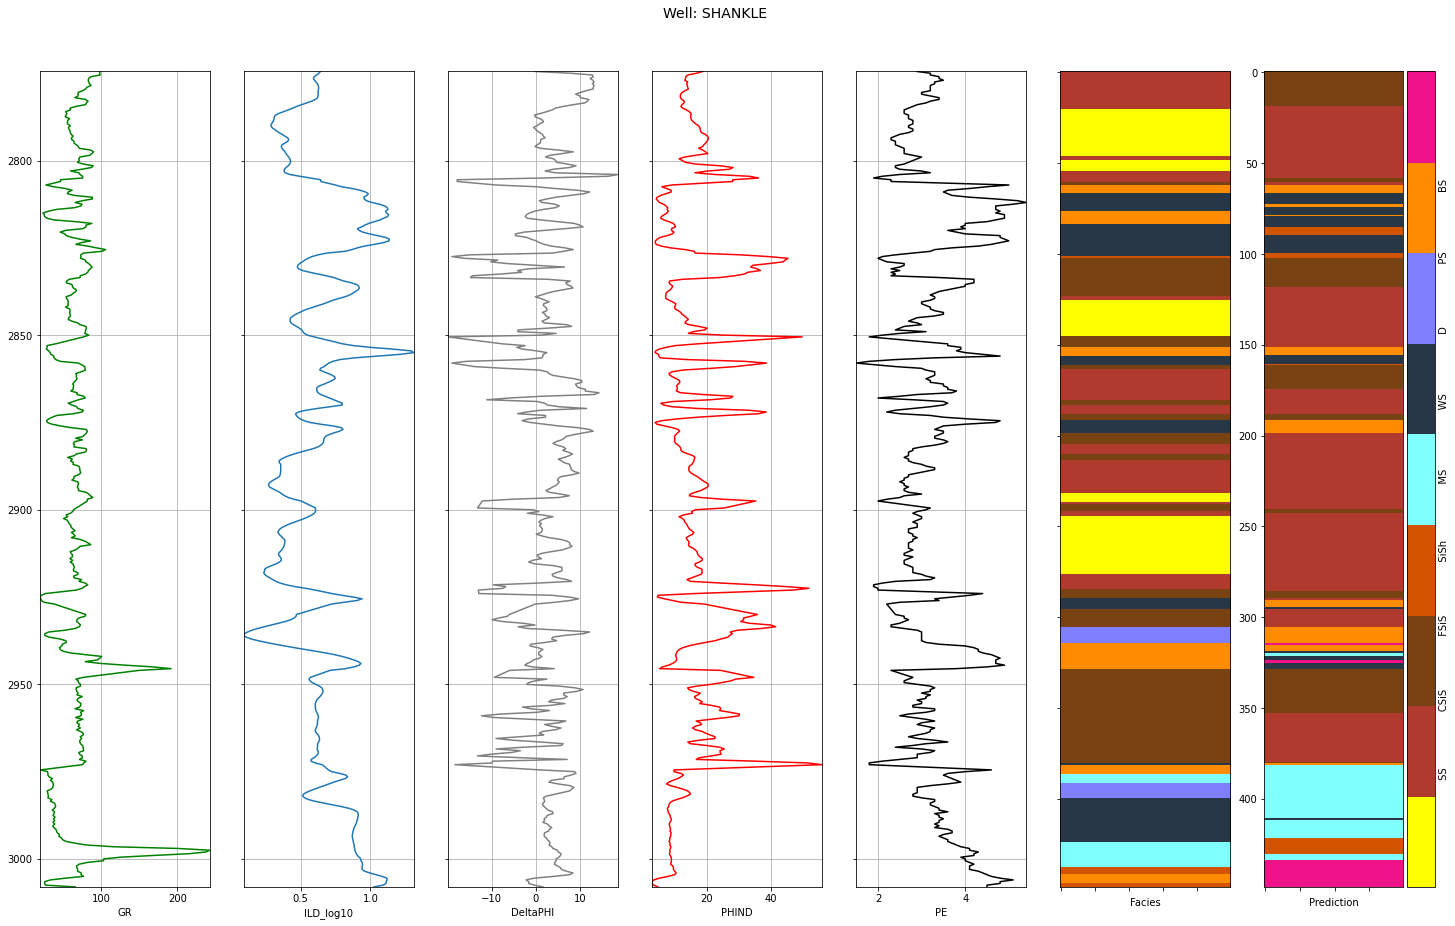

In [ ]:
compare_facies_plot(well_number3, 'Prediction', test_data['Depth'].min(), test_data['Depth'].max())

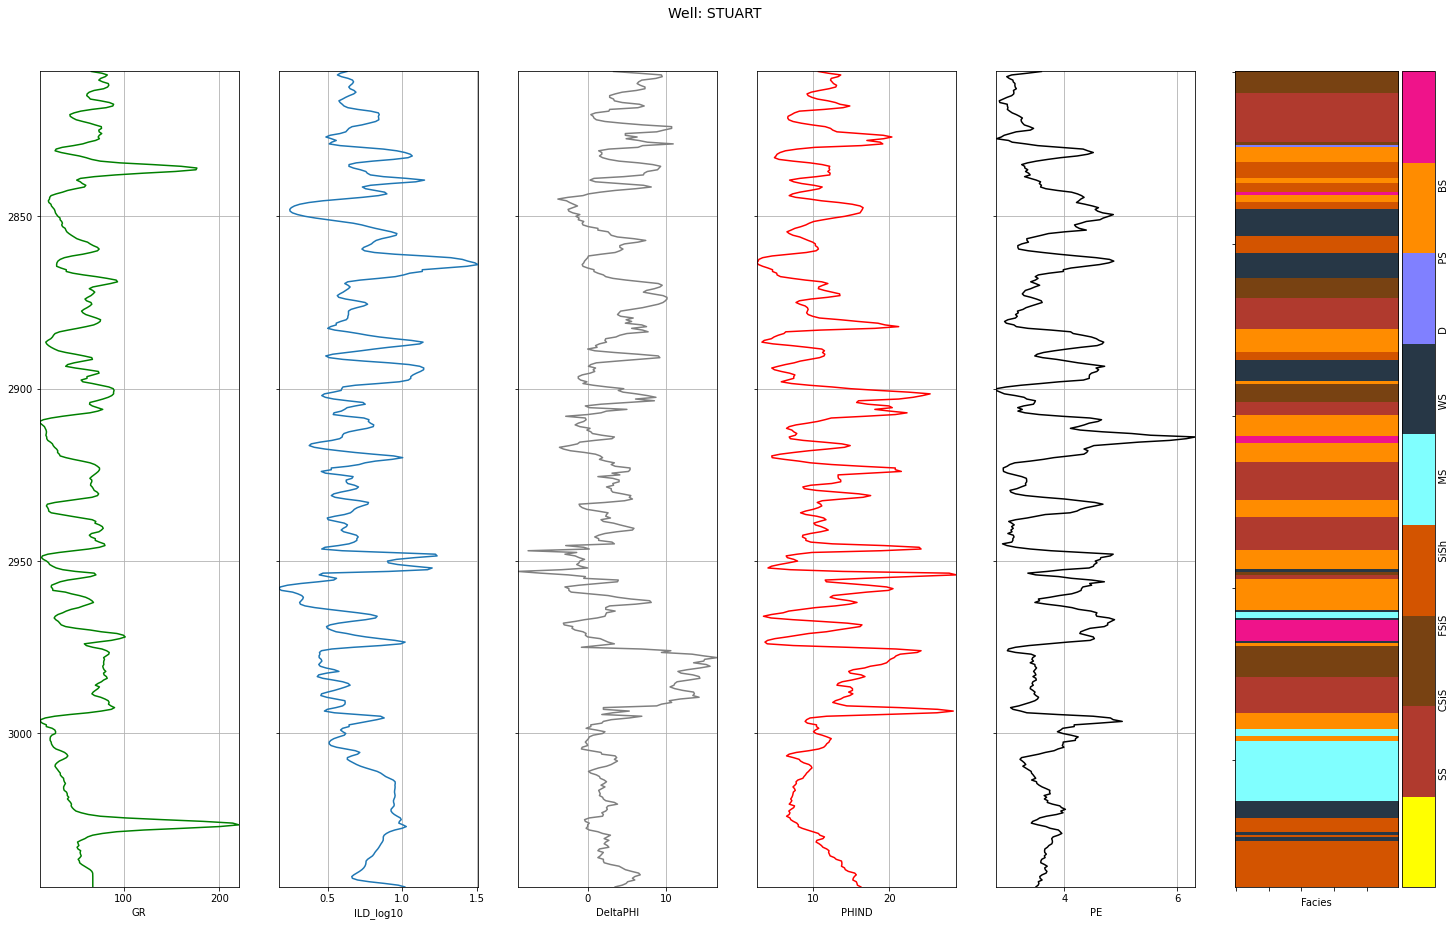

In [ ]:
X_well11 = Robust.transform(well_number11.drop(['Well Name', 'Facies'], axis=1))
X_well11 = Standard.transform(X_well11)
X_well11 = MinMax.transform(X_well11)

Y_Pred  = KNN.predict(X_well11)
well_number11['Facies'] = Y_Pred
log_well(well_number11.sort_values("Depth"), well_number11['Depth'].min(), well_number11['Depth'].max())

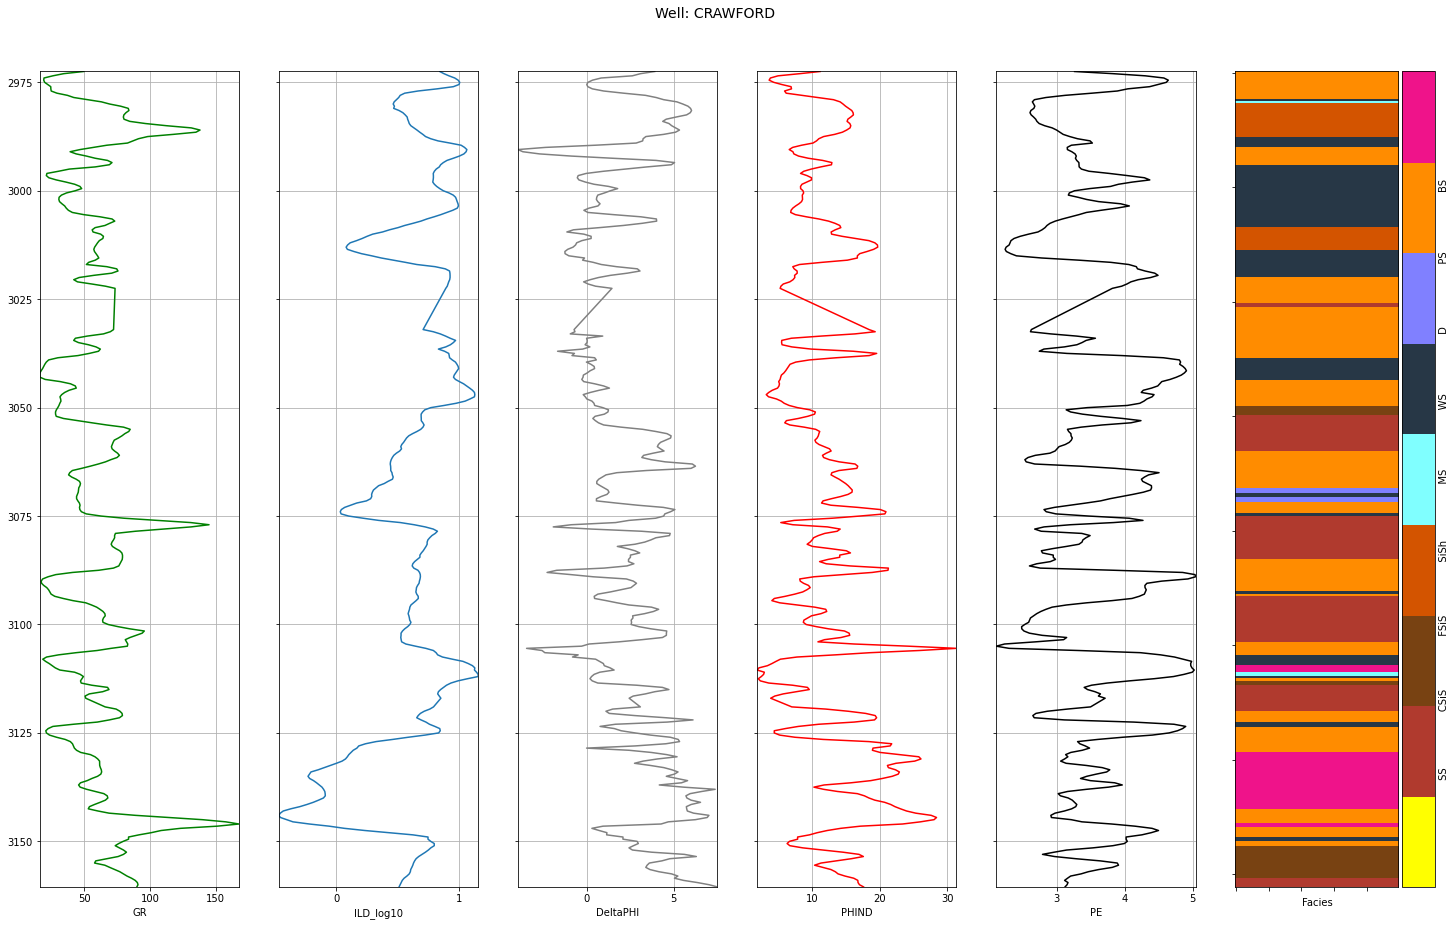

In [ ]:
X_well12 = Robust.transform(well_number12.drop(['Well Name', 'Facies'], axis=1))
X_well12 = Standard.transform(X_well12)
X_well12 = MinMax.transform(X_well12)

Y_Pred  = KNN.predict(X_well12)
well_number12['Facies'] = Y_Pred
log_well(well_number12.sort_values("Depth"), well_number12['Depth'].min(), well_number12['Depth'].max())